In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image
import time
import matplotlib.pyplot as plt
import random
import datetime
%matplotlib inline
import re
pd.set_option('display.max_rows', 1000)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

%matplotlib inline

# VOD 이용량 2013~2018

In [3]:
df2018=pd.read_excel('./Practice/2018.xlsx', encoding='EUCKR')
df2018=df2018.drop(columns=['감독','배우','2017년 총이용건수', '등급', '2018년 총이용건수'], axis=1)
#2018년 월평균 이용건수 계산(첫달 제외)
List=[]
Mean=[]
for i in range(len(df2018)):
    List=[]
    left=0
    for j in range(6,14):
        if df2018.loc[i][j]!=0 and left==0:        #VOD 개시 당월은 제외(Frame에서 가장 왼쪽 숫자는 제외한다.)
            left+=1
        elif df2018.loc[i][j]!=0 and left!=0:
            List.append(df2018.loc[i][j])
        else:
            pass
    print(List)
    if len(List)==0:                           #이용건수가 1달밖에 없는 영화는 1개분 이용건수로 대체한다.
        temp=df2018.loc[i][13]
    else:
        temp=sum(List)/len(List)
    Mean.append(temp)
df2018['2018년 월평균 이용통계']=Mean
df2018

[450077]
[397574]
[644307, 401048, 110898, 65018, 51118, 109918, 322190]
[226130]
[382273, 212060]
[]
[427538, 114210]
[]
[]
[89038]
[966, 819, 896, 1237, 1376, 8898, 85806]
[121519, 77711]
[226196, 71821]
[]
[62028]
[1, 105669, 235077, 86950, 52353]
[]
[84899, 50349, 38051, 39635, 48784, 38207, 46865]
[32545, 24467, 27826, 33474, 26914, 41963, 44185]
[143454, 89540, 41999]
[2247, 1646, 1757, 1850, 3657, 65895, 36391]
[35550]
[118614, 48690, 35159]
[1161, 958, 723, 887, 3101, 24222, 33846]
[3383, 1931, 1480, 2042, 2872, 8245, 30480]
[161488, 56843, 40214, 116726, 39282, 30363, 29519]
[230110, 62390, 40605, 28795]
[101103, 72054, 43699, 28115]
[132812, 93252, 47744, 33378, 37521, 28034]
[26649]
[2305, 1459, 1761, 2521, 1848, 46810, 26070]
[]
[1258, 810, 589, 4075, 55096, 49225, 22454]
[5, 48, 6, 8, 118804, 115595, 22001]
[88492, 70232, 22265, 21370, 21620]
[287832, 67925, 32880, 23279, 27557, 21483]
[48074, 20794]
[6178, 20388]
[20350]
[12776, 8999, 26750, 88590, 25738, 22553, 20233]
[2

,순위,FIMS코드,영화명,제작연도,제작국가,극장개봉일,2018.1월 이용건수,2018.2월 이용건수,2018.3월 이용건수,2018.4월 이용건수,2018.5월 이용건수,2018.6월 이용건수,2018.7월 이용건수,2018.8월 이용건수,2018년 월평균 이용통계
0,1,20185341,마녀,2018,한국,20180627.0,0,0,0,0,0,0,196930,450077,450077.000000
1,2,20177478,어벤져스: 인피니티 워,2018,미국,20180425.0,0,0,0,0,0,0,74249,397574,397574.000000
2,3,20150976,신과함께-죄와 벌,2017,한국,20171220.0,5171,644307,401048,110898,65018,51118,109918,322190,243499.571429
3,4,20178161,탐정: 리턴즈,2018,한국,20180613.0,0,0,0,0,0,0,219359,226130,226130.000000
4,5,20179086,쥬라기 월드: 폴른 킹덤,2018,미국,20180606.0,0,0,0,0,0,2720,382273,212060,297166.500000
5,6,20170942,인랑,2018,한국,20180725.0,0,0,0,0,0,0,0,128082,128082.000000
6,7,20179383,독전,2017,한국,20180522.0,0,0,0,0,0,193263,427538,114210,270874.000000
7,8,20181443,스카이 스크래퍼,2018,미국,20180711.0,0,0,0,0,0,0,0,112626,112626.000000
8,9,20174369,변산,2017,한국,20180704.0,0,0,0,0,0,0,0,93546,93546.000000
9,10,20184903,오션스 8,2018,미국,20180613.0,0,0,0,0,0,0,50718,89038,89038.000000


In [4]:
df2017=pd.read_excel('./Practice/2017.xlsx', encoding='EUCKR')
df2017=df2017.drop(columns=['감독','배우','2016년 총 이용건수', '등급', '2017년 총 이용건수'], axis=1)
#2018년 월평균 이용건수 계산(첫달 제외)
List=[]
Mean=[]
for i in range(len(df2017)):
    List=[]
    left=0
    for j in range(6,18):
        if df2017.loc[i][j]!=0 and left==0:        #VOD 개시 당월은 제외(Frame에서 가장 왼쪽 숫자는 제외한다.)
            left+=1
        elif df2017.loc[i][j]!=0 and left!=0:
            List.append(df2017.loc[i][j])
        else:
            pass
    print(List)
    if len(List)==0:                           #이용건수가 1달밖에 없는 영화는 1개분 이용건수로 대체한다.
        temp=df2017.loc[i][17]
    else:
        temp=sum(List)/len(List)
    Mean.append(temp)
df2017['2017년 월평균 이용통계']=Mean
df2017

[703057]
[268490]
[]
[210576, 224868]
[135585]
[126061]
[]
[103263]
[124334, 94205]
[]
[]
[65667]
[457800, 91802, 62611]
[395578, 104748, 55495]
[52902]
[52781]
[]
[]
[138024, 48621]
[285988, 115666, 41217, 38662, 27194, 43829]
[]
[42952, 42225]
[]
[159404, 31684, 35530]
[]
[]
[29059, 31880]
[110424, 38818, 24512, 30643, 24816, 28425]
[185481, 60034, 27348]
[101404, 26743]
[110567, 45591, 33204, 14640, 24914]
[74815, 36329, 17275, 24899]
[2246, 1121, 999, 1261, 928, 1401, 2184, 1462, 2011, 3013, 24533]
[479301, 126049, 65115, 40680, 47974, 30789, 16135, 23528, 31406, 24528]
[]
[127759, 81925, 17623, 23764]
[119117, 23394]
[169771, 68064, 66501, 34784, 37732, 27016, 20353, 32734, 16722, 23311]
[23270]
[]
[21285]
[20479]
[46816, 20148]
[13586, 8248, 7179, 7661, 5664, 12034, 11706, 8364, 7482, 12394, 19753]
[98073, 38441, 37491, 38324, 40918, 27637, 39729, 18359]
[132506, 49098, 14897, 13446, 14262, 19886, 32121, 9999, 21812, 30590, 18344]
[121491, 63402, 26958, 17940, 11771, 18282]
[109,

,순위,FIMS코드,영화명,제작연도,제작국가,극장개봉일,2017.1월 이용건수,2017.2월 이용건수,2017.3월 이용건수,2017.4월 이용건수,2017.5월 이용건수,2017.6월 이용건수,2017.7월 이용건수,2017.8월 이용건수,2017.9월 이용건수,2017.10월 이용건수,2017.11월 이용건수,2017.12월 이용건수,2017년 월평균 이용통계
0,1,20172742,범죄도시,2017,한국,20171003.0,0,0,0,0,0,0,0,0,0,0,637451,703057,703057.000000
1,2,20172603,부라더,2017,한국,20171102.0,0,0,0,0,0,0,0,0,0,0,334,268490,268490.000000
2,3,20165748,꾼,2017,한국,20171122.0,0,0,0,0,0,0,0,0,0,0,0,252326,252326.000000
3,4,20175222,킹스맨: 골든 서클,2017,"미국,영국",20170927.0,0,0,0,0,0,0,0,0,0,12674,210576,224868,217722.000000
4,5,20169643,침묵,2017,한국,20171102.0,0,0,0,0,0,0,0,0,0,0,59975,135585,135585.000000
5,6,20165450,남한산성,2017,한국,20171003.0,0,0,0,0,0,0,0,0,0,0,237814,126061,126061.000000
6,7,20161762,반드시 잡는다,2017,한국,20171129.0,0,0,0,0,0,0,0,0,0,0,0,105966,105966.000000
7,8,20161681,미옥,2017,한국,20171109.0,0,0,0,0,0,0,0,0,0,0,15305,103263,103263.000000
8,9,20174142,아이 캔 스피크,2017,한국,20170921.0,0,0,0,0,0,0,0,0,0,56127,124334,94205,109269.500000
9,10,20174622,해피 데스데이,2017,미국,20171108.0,0,0,0,0,0,0,0,0,0,0,0,79025,79025.000000


In [5]:
df2016=pd.read_excel('./Practice/2016.xlsx', encoding='EUCKR')
df2016=df2016.drop(columns=['감독','배우','2015년 총 이용건수', '등급', '2016년 총 이용건수'], axis=1)
#2018년 월평균 이용건수 계산(첫달 제외)
List=[]
Mean=[]
for i in range(len(df2016)):
    List=[]
    left=0
    for j in range(6,18):
        if df2016.loc[i][j]!=0 and left==0:        #VOD 개시 당월은 제외(Frame에서 가장 왼쪽 숫자는 제외한다.)
            left+=1
        elif df2016.loc[i][j]!=0 and left!=0:
            List.append(df2016.loc[i][j])
        else:
            pass
    print(List)
    if len(List)==0:                           #이용건수가 1달밖에 없는 영화는 1개분 이용건수로 대체한다.
        temp=df2016.loc[i][17]
    else:
        temp=sum(List)/len(List)
    Mean.append(temp)
df2016['2016년 월평균 이용통계']=Mean
df2016

[462656]
[156334, 140999]
[236467, 139531]
[123282, 131939]
[]
[221298, 302647, 84621, 126144]
[242735, 97633, 44217, 26323, 93435]
[]
[]
[198, 1434, 271, 852, 81260]
[]
[99386, 56564]
[]
[51344]
[40792, 48717]
[46477]
[243963, 119483, 63187, 81917, 41763, 53662, 13889, 12318, 46197]
[44681]
[43708]
[135829, 116098, 18935, 42240]
[197881, 35245, 41338]
[429935, 234565, 102694, 42087, 30221, 37511]
[89082, 37111, 34772]
[37200, 29782, 8100, 33218]
[75010, 32504]
[]
[]
[180533, 48102, 13810, 9573, 29701]
[70248, 52157, 7783, 27727]
[]
[26269]
[]
[24514]
[10125, 19779, 16950, 12442, 10677, 17379, 14289, 11241, 10225, 11930, 24084]
[23430]
[140699, 115034, 40639, 26588, 57665, 10971, 2803, 6401, 23429]
[19168, 13817, 12512, 14650, 9283, 11054, 13768, 8409, 13708, 9951, 22284]
[243369, 127191, 17118, 21603]
[73342, 22415, 20937]
[95068, 53800, 20518]
[205740, 154409, 72018, 49083, 16566, 10519, 20426]
[60950, 26035, 25542, 32770, 19851, 24597, 28236, 16942, 16806, 26390, 19529]
[318121, 115

,순위,FIMS코드,영화명,제작연도,제작국가,개봉일,2016.1월 이용건수,2016.2월 이용건수,2016.3월 이용건수,2016.4월 이용건수,2016.5월 이용건수,2016.6월 이용건수,2016.7월 이용건수,2016.8월 이용건수,2016.9월 이용건수,2016.10월 이용건수,2016.11월 이용건수,2016.12월 이용건수,2016년 월평균 이용통계
0,1,20153444,럭키,2015,한국,20161013,0,0,0,0,0,0,0,0,0,0,346848,462656,462656.000000
1,2,20159646,밀정,2016,한국,20160907,0,0,0,0,0,0,0,0,0,114434,156334,140999,148666.500000
2,3,20153443,아수라,2016,한국,20160928,0,0,0,0,0,0,0,0,0,90557,236467,139531,187999.000000
3,4,20164501,미스 페레그린과 이상한 아이들의 집,2016,"미국,벨기에,영국",20160928,0,0,0,0,0,0,0,0,0,1384,123282,131939,127610.500000
4,5,20154661,형,2016,한국,20161123,0,0,0,0,0,0,0,0,0,0,0,128843,128843.000000
5,6,20156564,부산행,2016,한국,20160720,0,0,0,0,0,0,0,7383,221298,302647,84621,126144,183677.500000
6,7,20144444,아가씨,2016,한국,20160601,0,0,0,0,0,0,82149,242735,97633,44217,26323,93435,100868.600000
7,8,20163521,스플릿,2016,한국,20161109,0,0,0,0,0,0,0,0,0,0,0,87893,87893.000000
8,9,20163294,매그니피센트 7,2016,미국,20160914,0,0,0,0,0,0,0,0,0,0,0,82591,82591.000000
9,10,20167839,벤허,2016,미국,20160914,0,0,0,0,0,0,29,198,1434,271,852,81260,16803.000000


In [6]:
df2015=pd.read_excel('./Practice/2015.xlsx', encoding='EUCKR')
df2015=df2015.drop(columns=['감독','배우','2014년 총 이용건수', '등급', '2015년 총 이용건수'], axis=1)
#2018년 월평균 이용건수 계산(첫달 제외)
List=[]
Mean=[]
for i in range(len(df2015)):
    List=[]
    left=0
    for j in range(6,18):
        if df2015.loc[i][j]!=0 and left==0:        #VOD 개시 당월은 제외(Frame에서 가장 왼쪽 숫자는 제외한다.)
            left+=1
        elif df2015.loc[i][j]!=0 and left!=0:
            List.append(df2015.loc[i][j])
        else:
            pass
    print(List)
    if len(List)==0:                           #이용건수가 1달밖에 없는 영화는 1개분 이용건수로 대체한다.
        temp=df2015.loc[i][17]
    else:
        temp=sum(List)/len(List)
    Mean.append(temp)
df2015['2015년 월평균 이용통계']=Mean
df2015

[355974, 248955]
[238064]
[216265]
[196509]
[182958]
[171858]
[277379, 160257]
[]
[626, 18461, 522624, 200090, 140483]
[]
[]
[38109, 85431]
[52397, 64130]
[60092]
[287883, 78669, 47485, 55982, 46512, 37472, 19214, 59275]
[95679, 59006]
[18073, 52271]
[49809]
[81865, 48437]
[44169]
[72791, 128595, 69453, 41269, 42846]
[1181, 241659, 108287, 8147, 29220, 41626]
[41471]
[39807]
[1038, 971, 1206, 1261, 1417, 1553, 2206, 4169, 3652, 4049, 39768]
[196987, 103340, 57259, 45341, 20682, 7369, 8044, 38067]
[44558, 36531]
[35657]
[154234, 77813, 34590]
[154765, 51441, 32821]
[33727, 23236, 17041, 18809, 20766, 19290, 21983, 17485, 14996, 16046, 29911]
[260031, 133608, 85090, 24437, 25844, 28501]
[371569, 257433, 70192, 21856, 5269, 27389]
[]
[3237, 148, 799, 104413, 85198, 25535, 24991]
[24275]
[23859]
[23832]
[22654]
[]
[21036]
[]
[183909, 47931, 20506]
[20247, 20074]
[19778]
[1187, 440, 287, 383, 498, 614, 534, 356, 324, 1430, 19742]
[]
[7242, 4767, 9610, 10335, 10372, 13431, 20309, 14876, 1002

,순위,FIMS코드,영화명,제작연도,제작국가,개봉일,2015.01.이용건수,2015.02.이용건수,2015.03.이용건수,2015.04.이용건수,2015.05.이용건수,2015.06 이용건수,2015.07 이용건수,2015.08 이용건수,2015.09 이용건수,201510 이용건수,2015.11 이용건수,2015. 12 이용건ㅅ,2015년 월평균 이용통계
0,1,20148048,베테랑,2014,한국,20150805,0,0,0,0,0,0,0,0,0,365239,355974,248955,302464.500000
1,2,20157464,더 폰,2015,한국,20151022,0,0,0,0,0,0,0,0,0,0,63214,238064,238064.000000
2,3,20156557,탐정 : 더 비기닝,2015,한국,20150924,0,0,0,0,0,0,0,0,0,0,158174,216265,216265.000000
3,4,20151383,마션,2015,미국,20151008,0,0,0,0,0,0,0,0,0,0,46986,196509,196509.000000
4,5,20142855,성난 변호사,2015,한국,20151008,0,0,0,0,0,0,0,0,0,0,84890,182958,182958.000000
5,6,20157465,그놈이다,2015,한국,20151028,0,0,0,0,0,0,0,0,0,0,42228,171858,171858.000000
6,7,20148846,사도,2014,한국,20150916,0,0,0,0,0,0,0,0,0,55514,277379,160257,218818.000000
7,8,20145503,검은 사제들,2015,한국,20151105,0,0,0,0,0,0,0,0,0,0,0,147865,147865.000000
8,9,20148851,암살,2015,한국,20150722,0,0,0,0,0,0,626,626,18461,522624,200090,140483,176456.800000
9,10,20152022,인턴,2015,미국,20150924,0,0,0,0,0,0,0,0,0,0,0,116948,116948.000000


In [7]:
df2014=pd.read_excel('./Practice/2014.xlsx', encoding='EUCKR')
df2014=df2014.drop(columns=['감독','배우','2013년 총 이용건수', '등급', '2014년 총 이용건수'], axis=1)
#2018년 월평균 이용건수 계산(첫달 제외)
List=[]
Mean=[]
for i in range(len(df2014)):
    List=[]
    left=0
    for j in range(9,21):
        if df2014.loc[i][j]!=0 and left==0:        #VOD 개시 당월은 제외(Frame에서 가장 왼쪽 숫자는 제외한다.)
            left+=1
        elif df2014.loc[i][j]!=0 and left!=0:
            List.append(df2014.loc[i][j])
        else:
            pass
    print(List)
    if len(List)==0:                           #이용건수가 1달밖에 없는 영화는 1개분 이용건수로 대체한다.
        temp=df2014.loc[i][20]
    else:
        temp=sum(List)/len(List)
    Mean.append(temp)
df2014['2014년 월평균 이용통계']=Mean
df2014

[]
[83, 188829]
[]
[156524, 111188]
[207578, 102180]
[]
[101088]
[93165]
[92522]
[85750]
[535943, 129407, 161905, 103649, 55291, 68533, 48694, 21125, 30998, 81988]
[]
[]
[61093]
[56317]
[52981]
[7420, 2314, 833, 1249, 51159]
[35532, 47252]
[74570, 46930, 34783]
[282127, 55401, 38756, 39797, 17879, 17931, 15503, 9195, 7334, 33554]
[60148, 30506]
[31837, 27392]
[102501, 26808, 26063]
[59381, 26005]
[128819, 34618, 32055, 10792, 19192, 24926]
[5173, 16015, 3450, 11255, 23323]
[8616, 3667, 1365, 391, 878, 22270]
[70132, 22125]
[69991, 19719, 16919, 17405, 20356, 12618, 11123, 6723, 5160, 4904, 20042]
[]
[]
[46382, 22129, 17861, 5361, 3859, 5541, 875, 1934, 19076]
[]
[37807, 18567]
[]
[50122, 17568, 18030]
[131175, 20307, 22337, 16217, 17382]
[]
[130707, 37083, 16731]
[16650]
[16403]
[125369, 23706, 10658, 15796]
[36941, 15788]
[34674, 8160, 3226, 1856, 15693]
[15125]
[127953, 45461, 13957, 5260, 2902, 14859]
[33411, 24039, 14141]
[13997]
[36238, 37983, 16909, 7175, 9065, 20897, 3574, 4159,

,순위,FIMS코드,영화명,제작연도,제작국가,개봉일,극장 관객수,극장 스크린수,극장 매출액,2014.01.이용건수,...,2014.04.이용건수,2014.05.이용건수,2014.06.이용건수,2014.07.이용건수,2014.08.이용건수,2014.09.이용건수,2014.10.이용건수,2014.11.이용건수,2014.12.이용건수,2014년 월평균 이용통계
0,1,20129370,명량,2013,한국,20140730.0,17611849,1586,135721087910,0,...,0,0,0,0,0,0,0,0,535338,535338.000000
1,2,20135656,루시,2014,"미국,프랑스",20140903.0,1974843,641,16467361039,0,...,0,0,0,0,0,0,114632,83,188829,94456.000000
2,3,20140694,퓨리,2014,"미국,영국",20141120.0,1362104,590,10367400686,0,...,0,0,0,0,0,0,0,0,115486,115486.000000
3,4,20136064,해적: 바다로 간 산적,2014,한국,20140806.0,8665652,837,66364656706,0,...,0,0,0,0,0,0,257527,156524,111188,133856.000000
4,5,20134804,타짜-신의 손,2014,한국,20140903.0,4015364,890,32373137927,0,...,0,0,0,0,0,0,110165,207578,102180,154879.000000
5,6,20149568,허큘리스,2014,미국,20140806.0,86528,278,669733800,0,...,0,0,0,0,0,0,0,0,101673,101673.000000
6,7,20149811,인투 더 스톰,2014,미국,20140828.0,2078496,585,16155960332,0,...,0,0,0,0,0,0,0,18134,101088,101088.000000
7,8,20149317,가디언즈 오브 갤럭시,2014,미국,20140731.0,1311232,539,11098510184,0,...,0,0,0,0,0,0,0,53018,93165,93165.000000
8,9,20148842,우리는 형제입니다,2014,한국,20141023.0,970373,566,7263255399,0,...,0,0,0,0,0,0,0,76201,92522,92522.000000
9,10,20148973,혹성탈출: 반격의 서막,2014,미국,20140710.0,4002539,922,31513748095,0,...,0,0,0,0,0,0,0,173240,85750,85750.000000


In [8]:
df2013=pd.read_excel('./Practice/2013.xlsx', encoding='EUCKR')
df2013=df2013.drop(columns=['감독','배우', '등급', '2013 총 이용건수'], axis=1)
#2018년 월평균 이용건수 계산(첫달 제외)
List=[]
Mean=[]
for i in range(len(df2013)):
    List=[]
    left=0
    for j in range(6,18):
        if df2013.loc[i][j]!=0 and left==0:        #VOD 개시 당월은 제외(Frame에서 가장 왼쪽 숫자는 제외한다.)
            left+=1
        elif df2013.loc[i][j]!=0 and left!=0:
            List.append(df2013.loc[i][j])
        else:
            pass
    print(List)
    if len(List)==0:                           #이용건수가 1달밖에 없는 영화는 1개분 이용건수로 대체한다.
        temp=df2013.loc[i][17]
    else:
        temp=sum(List)/len(List)
    Mean.append(temp)
df2013['2013년 월평균 이용통계']=Mean
df2013

[316112]
[]
[]
[]
[115642]
[]
[]
[]
[]
[81670]
[50578, 79790]
[]
[50377]
[]
[]
[46075]
[43829]
[39981, 42712]
[]
[65781, 37852]
[81495, 27463, 3886, 3087, 17297, 1339, 735, 2432, 37160]
[]
[33220]
[81996, 31193]
[30937]
[318968, 107747, 86235, 90137, 27259, 17450, 21144, 30629]
[269790, 70128, 29650]
[26315]
[135550, 49108, 26217]
[26053]
[1692, 1666, 1321, 12, 2, 3276, 4546, 2760, 11259, 68114, 24871]
[59043, 24825]
[246272, 56237, 23749, 24578]
[91388, 24527]
[2171, 2809, 986, 924, 775, 1426, 753, 612, 1752, 36913, 22897]
[]
[21205]
[]
[20247]
[61, 66193, 19886]
[68652, 9667, 7703, 19401]
[160257, 34833, 16337, 18736]
[18286]
[]
[90456, 17818, 17709]
[4, 353, 737, 334, 596, 1210, 2169, 1316, 1496, 13683, 16802]
[88186, 30776, 16388]
[18836, 16439, 13943, 14066, 18606, 18265, 28929, 19849, 15569, 14225, 15360]
[101268, 15139]
[355467, 143786, 89074, 55132, 29278, 19732, 24481, 15008]
[93749, 25561, 13834]
[29657, 20110, 7017, 13678]
[112975, 18110, 35260, 4880, 13150]
[44891, 7003, 44

,No,FIMS코드,영화명,제작연도,제작국가,개봉일,1월 이용건수,2월 이용건수,3월 이용건수,4월 이용건수,5월 이용건수,6월 이용건수,7월 이용건수,8월 이용건수,9월 이용건수,10월 이용건수,11월 이용건수,2013년 12월 이용건수,2013년 월평균 이용통계
0,1,20126091,관상,2013,한국,20130911,0,0,0,0,0,0,0,0,0,0,482792,316112,316112.000000
1,2,20123383,화이: 괴물을 삼킨 아이,2013,한국,20131009,0,0,0,0,0,0,0,0,0,0,0,214917,214917.000000
2,3,20137044,친구 2,2013,한국,20131114,0,0,0,0,0,0,0,0,0,0,0,205298,205298.000000
3,4,20134582,소원,2013,한국,20131002,0,0,0,0,0,0,0,0,0,0,0,150512,150512.000000
4,5,20129606,공범,2012,한국,20131024,0,0,0,0,0,0,0,0,0,0,20224,115642,115642.000000
5,6,20127595,동창생,2013,한국,20131106,0,0,0,0,0,0,0,0,0,0,0,108454,108454.000000
6,7,20134801,더 파이브,2013,한국,20131114,0,0,0,0,0,0,0,0,0,0,0,99178,99178.000000
7,8,20132824,리딕,2013,미국,20131128,0,0,0,0,0,0,0,0,0,0,0,95893,95893.000000
8,9,20122089,슈퍼배드 2,2013,미국,20130912,0,0,0,0,0,0,0,0,0,0,0,88843,88843.000000
9,10,20136962,레드: 더 레전드,2012,미국,20130718,0,0,0,0,0,0,0,0,0,0,41878,81670,81670.000000


In [9]:
_2013=pd.DataFrame(df2013, columns=("영화명","2013년 월평균 이용통계"))

In [10]:
_2014=pd.DataFrame(df2014, columns=("영화명","2014년 월평균 이용통계"))
_2015=pd.DataFrame(df2015, columns=("영화명","2015년 월평균 이용통계"))
_2016=pd.DataFrame(df2016, columns=("영화명","2016년 월평균 이용통계"))
_2017=pd.DataFrame(df2017, columns=("영화명","2017년 월평균 이용통계"))
_2018=pd.DataFrame(df2018, columns=("영화명","2018년 월평균 이용통계"))

In [11]:
result=_2013
result=result.merge(_2014, how='outer', on='영화명')
result=result.merge(_2015, how='outer', on='영화명')
result=result.merge(_2016, how='outer', on='영화명')
result=result.merge(_2017, how='outer', on='영화명')
result=result.merge(_2018, how='outer', on='영화명')
result

,영화명,2013년 월평균 이용통계,2014년 월평균 이용통계,2015년 월평균 이용통계,2016년 월평균 이용통계,2017년 월평균 이용통계,2018년 월평균 이용통계
0,관상,316112.000000,NaN,NaN,NaN,NaN,NaN
1,화이: 괴물을 삼킨 아이,214917.000000,NaN,NaN,NaN,NaN,NaN
2,친구 2,205298.000000,18632.727273,NaN,NaN,NaN,NaN
3,소원,150512.000000,NaN,NaN,NaN,NaN,NaN
4,공범,115642.000000,NaN,NaN,NaN,NaN,NaN
5,동창생,108454.000000,NaN,NaN,NaN,NaN,NaN
6,더 파이브,99178.000000,NaN,NaN,NaN,NaN,NaN
7,리딕,95893.000000,NaN,NaN,NaN,NaN,NaN
8,슈퍼배드 2,88843.000000,NaN,NaN,NaN,NaN,2797.714286
9,레드: 더 레전드,81670.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
df=result.fillna(0)

In [13]:
df

,영화명,2013년 월평균 이용통계,2014년 월평균 이용통계,2015년 월평균 이용통계,2016년 월평균 이용통계,2017년 월평균 이용통계,2018년 월평균 이용통계
0,관상,316112.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,화이: 괴물을 삼킨 아이,214917.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,친구 2,205298.000000,18632.727273,0.000000,0.000000,0.000000,0.000000
3,소원,150512.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,공범,115642.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,동창생,108454.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,더 파이브,99178.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,리딕,95893.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,슈퍼배드 2,88843.000000,0.000000,0.000000,0.000000,0.000000,2797.714286
9,레드: 더 레전드,81670.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
List=[]
Mean=[]
for i in range(len(df)):
    List=[]
    right=0
    for j in range(1,7):
        if df.loc[i][j]==0 and right==0:
            pass
        elif df.loc[i][j]!=0 and right==0:        #VOD 개시 당월은 제외(Frame에서 가장 왼쪽 숫자는 제외한다.)
            List.append(df.loc[i][j])
            right+=1
        elif df.loc[i][j]!=0 or left!=0:
            List.append(df.loc[i][j])
        else:
            pass
    print(List)
    temp=sum(List)/len(List)
    Mean.append(temp)

[316112.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[214917.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[205298.0, 18632.727272727272, 0.0, 0.0, 0.0, 0.0]
[150512.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[115642.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[108454.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[99178.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[95893.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[88843.0, 0.0, 0.0, 0.0, 0.0, 2797.714285714286]
[81670.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[65184.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[58615.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[50377.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[46867.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[46812.0, 0.0, 0.0, 0.0, 0.0, 3671.714285714286]
[46075.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[43829.0, 0.0, 51067.666666666664, 0.0, 3162.6363636363635, 0.0]
[41346.5, 0.0, 0.0, 0.0, 0.0, 0.0]
[39427.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[51816.5, 0.0, 0.0, 0.0, 0.0, 0.0]
[19432.666666666668, 1955.090909090909, 0.0, 0.0, 0.0, 0.0]
[35603.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[33220.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[56594.5, 0.0, 0.0, 0.0, 0.0, 0.0]
[30937.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[87446.125, 0.0, 0.0,

[22654.0, 0.0, 0.0, 0.0]
[21196.0, 0.0, 0.0, 0.0]
[21036.0, 0.0, 0.0, 0.0]
[21029.0, 27058.909090909092, 10370.09090909091, 10263.142857142857]
[84115.33333333333, 0.0, 0.0, 0.0]
[20160.5, 0.0, 0.0, 0.0]
[19778.0, 0.0, 0.0, 0.0]
[18940.0, 0.0, 0.0, 0.0]
[58760.333333333336, 0.0, 0.0, 0.0]
[41365.5, 0.0, 0.0, 0.0]
[37996.666666666664, 0.0, 0.0, 0.0]
[25730.0, 0.0, 0.0, 0.0]
[52070.0, 0.0, 0.0, 0.0]
[24061.5, 0.0, 0.0, 0.0]
[17198.0, 0.0, 0.0, 0.0]
[49994.0, 0.0, 0.0, 0.0]
[16799.0, 0.0, 0.0, 0.0]
[74137.8, 0.0, 0.0, 0.0]
[16355.0, 0.0, 0.0, 0.0]
[25535.0, 0.0, 0.0, 0.0]
[2865.6363636363635, 0.0, 0.0, 0.0]
[26282.333333333332, 0.0, 0.0, 0.0]
[26291.5, 0.0, 0.0, 0.0]
[14257.0, 0.0, 0.0, 0.0]
[34939.0, 0.0, 0.0, 0.0]
[46331.0, 0.0, 0.0, 0.0]
[49345.375, 0.0, 0.0, 0.0]
[12962.0, 0.0, 0.0, 0.0]
[15181.0, 0.0, 0.0, 0.0]
[4240.0, 0.0, 0.0, 0.0]
[12329.0, 0.0, 0.0, 0.0]
[20338.75, 0.0, 0.0, 0.0]
[22157.333333333332, 0.0, 0.0, 0.0]
[117302.6, 0.0, 0.0, 0.0]
[11901.0, 0.0, 0.0, 0.0]
[8323.6666666

In [15]:
df['VOD 월 이용 평균']=Mean

In [16]:
df=pd.DataFrame(df, columns=("영화명","VOD 월 이용 평균"))

# 월 이용건수로 계산

In [17]:
movielist=df['영화명']

In [18]:
VODDF=df

# 네이버 광고 키워드 도구 크롤링

# 자동웹브라우져 실행 및 네이버 광고 로그인
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)
url_page = 'https://manage.searchad.naver.com/customers/1510068/tool/keyword-planner'
driver.get(url_page)
time.sleep(5)
nvad_id='honggi102'
nvad_pw='nvad9632'
driver.find_element_by_xpath('//*[@id="uid"]').send_keys(nvad_id)
driver.find_element_by_xpath('//*[@id="upw"]').send_keys(nvad_pw)
driver.find_element_by_xpath('//*[@id="container"]/div/div/fieldset/span/button').click()

def NvadParsing(movielist, n=0):
    NVAD=[]
    
    for i in movielist[n::]:
        pc=0
        mobile=0
        kw_list=i.replace(':','')
        driver.find_element_by_xpath('//*[@id="wrap"]/div/div/div[1]/div[1]/div/div/div/div[2]/div[1]/div[1]/div[2]/form/div[1]/div/div/textarea').clear()
        driver.find_element_by_xpath('//*[@id="wrap"]/div/div/div[1]/div[1]/div/div/div/div[2]/div[1]/div[1]/div[2]/form/div[1]/div/div/textarea').send_keys(kw_list)
        driver.find_element_by_xpath('//*[@id="wrap"]/div/div/div[1]/div[1]/div/div/div/div[2]/div[1]/div[1]/div[2]/form/div[4]/div/div/ul/li/button').click()
        time.sleep(2)
        try:
            alert=driver.switch_to_alert()
            alert.accept()
            pc_int=0
            mobile_int=0
            NVAD.append(pc_int+mobile_int)
        except:
            try:
                html=driver.page_source
                soup=BeautifulSoup(html,'lxml')
                time.sleep(4)
                getList=soup.find_all('td')
                pc=getList[2].get_text()
                mobile=getList[3].get_text()
                pc_int=int(pc.replace(',','').replace('<',''))
                mobile_int=int(mobile.replace(',','').replace('<',''))
                NVAD.append(pc_int+mobile_int)   
                pass
            except:
                time.sleep(10)
                html=driver.page_source
                soup=BeautifulSoup(html,'lxml')
                time.sleep(4)
                getList=soup.find_all('td')
                pc=getList[2].get_text()
                mobile=getList[3].get_text()
                pc_int=int(pc.replace(',','').replace('<',''))
                mobile_int=int(mobile.replace(',','').replace('<',''))
                NVAD.append(pc_int+mobile_int)   
                pass
        print(kw_list, pc_int+mobile_int, NVAD)
    return NVAD

In [96]:
#영화이름, 평점, 코드 추출
Movielist=[]
Scorelist=[]
Code=[]
for i in range(1,11):
    url_page = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20181114&page={}'.format(i)
    html=urlopen(url_page)
    soup=BeautifulSoup(html,'lxml')
    SoupList=soup.find_all('div','tit5')
    ScoreList=soup.find_all('td','point')
    time.sleep(1)
    for item in SoupList:
        Movielist.append(item.get_text().replace('\n',''))
        CodeSoup=item.find_all('a')
        code=str(CodeSoup)
        pattern = re.compile("\=\d+")
        code=pattern.findall(code)
        code=code[0].replace('=','')
        Code.append(code)
    for item2 in ScoreList:
        Scorelist.append(float(item2.get_text()))
    print(i,'searching')

1 searching
2 searching
3 searching
4 searching
5 searching
6 searching
7 searching
8 searching
9 searching
10 searching


In [97]:
Country=[]
Reopen=[]
for i in range(len(Code)):
    url='https://movie.naver.com/movie/bi/mi/basic.nhn?code={}'.format(Code[i])
    html=urlopen(url)
    soup=BeautifulSoup(html, 'lxml')
    AbstractList=soup.find_all('dl', 'info_spec')
    reopen=0
    if '재개봉' in str(AbstractList):
        reopen=1
    else:
        pass
    Reopen.append(reopen)
    try:
        AbstractElement=AbstractList[0].find_all('a')
        c=0
        for item in AbstractElement:
            if '한국' in str(item):
                c=1
            else:
                pass
    except:
        pass
    Country.append(c)

Searching=NvadParsing(Movielist)
MovieDF=pd.DataFrame({'Title':Movielist, 'Score':Scorelist, 'Searching':Searching})

MovieDF.sort_values('Searching', ascending=False)

MovieDF=pd.read_csv('./MovieDF.txt', encoding='utf-8')

MovieDF=pd.DataFrame(MovieDF, columns=("Title","Score", "Searching"))

MovieDF

# 영화이름 매칭

In [125]:
MovieDF=pd.read_csv('./Practice/MovieDF_REV3.txt', encoding='UTF-8')
MovieDF=pd.DataFrame(MovieDF, columns=['Title','국내{1}/외국(0)','관객수','Score','해외영화제수상','국내영화제수상','Searching','VOD이용건수','재개봉여부'])
MovieDF['국내{1}/외국(0)']=Country
MovieDF['재개봉여부']=Reopen

In [126]:
#VOD 이용건 타이틀 특수문자제거
VODList=[]
for item in list(VODDF['영화명']):
    temp=re.sub('[^가-힝A-Za-z0-9]+','',item)
    VODList.append(temp)
VODList

['관상',
 '화이괴물을삼킨아이',
 '친구2',
 '소원',
 '공범',
 '동창생',
 '더파이브',
 '리딕',
 '슈퍼배드2',
 '레드더레전드',
 '깡철이',
 '창수',
 '캡틴필립스',
 '하늘에서음식이내린다면2',
 '컨저링',
 '퍼시잭슨과괴물의바다',
 '스파이',
 '몬스터대학교',
 '화려한외출',
 '엘리시움',
 '호빗뜻밖의여정',
 '프리즈너스',
 '응징자',
 '퍼시픽림',
 'RIPD알아이피디',
 '7번방의선물',
 '숨바꼭질',
 '야관문욕망의꽃',
 '나우유씨미마술사기단',
 '노브레싱',
 '바람',
 '맨오브스틸',
 '감시자들',
 '밤의여왕',
 '헝거게임판엠의불꽃',
 '결혼전야',
 '더울버린',
 '극장판토리코미식신의스페셜메뉴',
 '섀도우헌터스뼈의도시',
 '개구쟁이스머프2',
 '은밀하게위대하게',
 '아이언맨3',
 '혈적자황제암살단',
 '산타의매직크리스탈',
 '화이트하우스다운',
 '하늘에서음식이내린다면',
 '월드워Z',
 '점박이한반도의공룡3D',
 '롤러코스터',
 '신세계',
 '터보',
 '애프터어스',
 '오블리비언',
 '가자장미여관으로',
 '붉은가족',
 '소녀',
 '분노의질주더맥시멈',
 '러브레이스',
 '잔다라더비기닝',
 '톱스타',
 '노리개',
 '웜바디스',
 '배우는배우다',
 '슈퍼배드',
 '투마더스',
 '인시디어스',
 '주먹왕랄프',
 '아티스트봉만대',
 '가문의영광5가문의귀환',
 '더테러라이브',
 '베를린',
 '감기',
 '극장판도라에몽진구의비밀도구박물관',
 '브레이킹던part2',
 '론레인저',
 '화이트타이거최강전차군단',
 '에픽숲속의전설',
 '극장판파워레인저엔진포스VS와일드스피릿',
 '극장판파워레인저캡틴포스VS미라클포스199히어로대결전',
 '니모를찾아서',
 '26년',
 '타워',
 '미스터고',
 '우리선희',
 '로맨틱홀리데이',
 '하녀',
 '어벤져스',
 '라푼젤',
 '나의PS파트너',
 '세이프헤이븐',
 '녹색의자2

In [127]:
#전체 DF 타이틀 특수문자제거
MovieList=[]
for item in list(MovieDF['Title']):
    temp=re.sub('[^가-힝A-Za-z0-9]+','',item)
    MovieList.append(temp)

In [128]:
MovieList

['보헤미안랩소디',
 '폴란드로간아이들',
 '아일라',
 '당갈',
 '덕구',
 '쇼생크탈출',
 '원더',
 '터미네이터2',
 '인생은아름다워',
 '매트릭스',
 '라이언일병구하기',
 '포레스트검프',
 '월E',
 '빽투더퓨쳐',
 '죽은시인의사회',
 '사운드오브뮤직',
 '헬프',
 '토이스토리3',
 '나홀로집에',
 '살인의추억',
 '위대한쇼맨',
 '글래디에이터',
 '센과치히로의행방불명',
 '반지의제왕왕의귀환',
 '레옹',
 '패왕별희',
 '아이캔스피크',
 '클래식',
 '동주',
 '캐스트어웨이',
 '에이리언2',
 '반지의제왕두개의탑',
 '굿바이마이프랜드',
 '여인의향기',
 '주토피아',
 '미세스다웃파이어',
 '서유기2선리기연',
 '세얼간이',
 '다시태어나도우리',
 '울지마톤즈',
 '히든피겨스',
 '굿윌헌팅',
 '아마데우스',
 '알라딘',
 '그대를사랑합니다',
 '쉰들러리스트',
 '지금만나러갑니다',
 '언터처블1의우정',
 '드래곤길들이기',
 '프린스앤프린세스',
 '아이언자이언트',
 '토이스토리',
 '오페라의유령25주년특별공연',
 '클레멘타인',
 '모노노케히메',
 '집으로',
 '다크나이트',
 '프리퀀시',
 '사랑은비를타고',
 '트루먼쇼',
 '타이타닉',
 '빌리엘리어트뮤지컬라이브',
 '라푼젤',
 '아이엠샘',
 '소원',
 '아기공룡둘리얼음별대모험',
 '오세암',
 '코러스',
 '더록',
 '해리포터와죽음의성물2부',
 '자백',
 '모던타임즈',
 '허스토리',
 '업',
 '나홀로집에2뉴욕을헤매다',
 '지상의별처럼',
 '천공의성라퓨타',
 '슈퍼소닉',
 '바이센테니얼맨',
 '뷰티풀투모로우',
 '피아니스트',
 '록키',
 '블라인드사이드',
 '주먹왕랄프',
 '세상에서가장아름다운이별',
 '내이름은칸',
 '천국의아이들',
 '쥬라기공원',
 '라따뚜이',
 '빌리엘리어트',
 '일급살인',
 '위대한독재자',
 '반지의제왕반지원정대',
 '시네마천국'

In [129]:
VODList

['관상',
 '화이괴물을삼킨아이',
 '친구2',
 '소원',
 '공범',
 '동창생',
 '더파이브',
 '리딕',
 '슈퍼배드2',
 '레드더레전드',
 '깡철이',
 '창수',
 '캡틴필립스',
 '하늘에서음식이내린다면2',
 '컨저링',
 '퍼시잭슨과괴물의바다',
 '스파이',
 '몬스터대학교',
 '화려한외출',
 '엘리시움',
 '호빗뜻밖의여정',
 '프리즈너스',
 '응징자',
 '퍼시픽림',
 'RIPD알아이피디',
 '7번방의선물',
 '숨바꼭질',
 '야관문욕망의꽃',
 '나우유씨미마술사기단',
 '노브레싱',
 '바람',
 '맨오브스틸',
 '감시자들',
 '밤의여왕',
 '헝거게임판엠의불꽃',
 '결혼전야',
 '더울버린',
 '극장판토리코미식신의스페셜메뉴',
 '섀도우헌터스뼈의도시',
 '개구쟁이스머프2',
 '은밀하게위대하게',
 '아이언맨3',
 '혈적자황제암살단',
 '산타의매직크리스탈',
 '화이트하우스다운',
 '하늘에서음식이내린다면',
 '월드워Z',
 '점박이한반도의공룡3D',
 '롤러코스터',
 '신세계',
 '터보',
 '애프터어스',
 '오블리비언',
 '가자장미여관으로',
 '붉은가족',
 '소녀',
 '분노의질주더맥시멈',
 '러브레이스',
 '잔다라더비기닝',
 '톱스타',
 '노리개',
 '웜바디스',
 '배우는배우다',
 '슈퍼배드',
 '투마더스',
 '인시디어스',
 '주먹왕랄프',
 '아티스트봉만대',
 '가문의영광5가문의귀환',
 '더테러라이브',
 '베를린',
 '감기',
 '극장판도라에몽진구의비밀도구박물관',
 '브레이킹던part2',
 '론레인저',
 '화이트타이거최강전차군단',
 '에픽숲속의전설',
 '극장판파워레인저엔진포스VS와일드스피릿',
 '극장판파워레인저캡틴포스VS미라클포스199히어로대결전',
 '니모를찾아서',
 '26년',
 '타워',
 '미스터고',
 '우리선희',
 '로맨틱홀리데이',
 '하녀',
 '어벤져스',
 '라푼젤',
 '나의PS파트너',
 '세이프헤이븐',
 '녹색의자2

In [130]:
MovieDF['VOD이용건수']=0
#VODList의 제목을 Movie List에서 찾아서 VOD 이용건수를 넣어준다
for i in range(len(VODList)):
    for j in range(len(MovieList)):
        if VODList[i]==MovieList[j]:
            print(MovieList[j],VODList[i])
            print(i,j)
            MovieDF.at[j,'VOD이용건수']=VODDF.iloc[i]['VOD 월 이용 평균']
        else:
            pass

소원 소원
3 64
캡틴필립스 캡틴필립스
12 433
바람 바람
30 112
터보 터보
50 401
주먹왕랄프 주먹왕랄프
66 83
라푼젤 라푼젤
87 62
겨울왕국 겨울왕국
110 315
비긴어게인 비긴어게인
117 442
어바웃타임 어바웃타임
147 275
수상한그녀 수상한그녀
151 496
인셉션 인셉션
152 196
끝까지간다 끝까지간다
153 491
반지의제왕반지원정대 반지의제왕반지원정대
173 92
반지의제왕두개의탑 반지의제왕두개의탑
192 31
베테랑 베테랑
194 458
국제시장 국제시장
208 453
인사이드아웃 인사이드아웃
209 380
보루토나루토더무비 보루토나루토더무비
226 159
에이미 에이미
245 497
분노의질주더세븐 분노의질주더세븐
257 338
스플릿 스플릿
297 498
벤허 벤허
299 184
설리허드슨강의기적 설리허드슨강의기적
303 289
자백 자백
322 70
주토피아 주토피아
328 34
내부자들디오리지널 내부자들디오리지널
329 420
해리포터와마법사의돌 해리포터와마법사의돌
336 177
동주 동주
353 28
이터널선샤인 이터널선샤인
356 329
노트북 노트북
364 399
나홀로집에 나홀로집에
373 18
나홀로집에 나홀로집에
374 18
싱스트리트 싱스트리트
382 451
범죄도시 범죄도시
383 290
아이캔스피크 아이캔스피크
391 26
뽀로로극장판공룡섬대모험 뽀로로극장판공룡섬대모험
393 250
택시운전사 택시운전사
395 397
모아나 모아나
419 277
미녀와야수 미녀와야수
430 105
미이라 미이라
431 207
로건 로건
438 386
나홀로집에 나홀로집에
443 18
어메이징메리 어메이징메리
470 297
이프온리 이프온리
481 364
다시태어나도우리 다시태어나도우리
495 38
히든피겨스 히든피겨스
503 40
공범자들 공범자들
513 293
세상에서가장아름다운이별 세상에서가장아름다운이별
516 84
쥬만지 쥬만지
520 123
토이스토리3 토이스토리3
524 17
타이타닉 타이타닉
5

In [131]:
MovieDF[MovieDF['VOD이용건수']!=0]

,Title,국내{1}/외국(0),관객수,Score,해외영화제수상,국내영화제수상,Searching,VOD이용건수,재개봉여부
2,아일라,1,14574,9.47,0,0,4710,22890,0
6,원더,0,114196,9.41,0,0,39090,18294,0
15,사운드 오브 뮤직,0,184410,9.38,3,0,21660,2804,1
17,토이 스토리 3,0,511917,9.38,0,0,14210,1179,0
18,나 홀로 집에,0,869820,9.38,0,0,29960,946,0
20,위대한 쇼맨,0,606546,9.37,0,0,114300,29833,0
26,아이 캔 스피크,1,796658,9.36,0,0,27770,58918,0
28,동주,1,376321,9.36,0,0,26200,3911,0
31,반지의 제왕: 두 개의 탑,0,1787872,9.35,0,0,1320,218,1
34,주토피아,0,1465960,9.35,0,0,44100,30815,0


# 수상이력 취합

In [132]:
PrizeDF=pd.read_csv('./Practice/semi_project_prize_list (1).csv', encoding='EUCKR')
PrizeDF

,Unnamed: 0,벤쿠버,칸,아카데미-작품,아카데미-남주,아카데미-여주,아카데미-남조,아카데미-여조,아카데미-감독,아카데미-각본,아카데미-음향,아카데미-음악,토론토,베를린,백상,대종상,청룡
0,1929년,NaN,NaN,날개,최후의 명령,제7의 천국,NaN,NaN,NaN,암흑가,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1930년,NaN,NaN,브로드웨이 멜로디,추억의 아리조나,코퀘트,NaN,NaN,정염의 미녀,패트리어트,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931년,NaN,NaN,서부 전선 이상 없다,디즈레일리,이혼녀,NaN,NaN,서부 전선 이상 없다,빅 하우스,빅 하우스,NaN,NaN,NaN,NaN,NaN,NaN
3,1932년,NaN,NaN,시마론,자유의 혼,참극의 선착장,NaN,NaN,스키피,새벽의 출격,Paramount,NaN,NaN,NaN,NaN,NaN,NaN
4,1933년,NaN,NaN,그랜드 호텔,지킬 박사와 하이드씨,마델론의 비극,NaN,NaN,배드 걸,챔프,Paramount,NaN,NaN,NaN,NaN,NaN,NaN
5,1934년,NaN,NaN,캐벌케이드,헨리 8세,아침의 영광,NaN,NaN,캐벌케이드,원 웨이 패시즈,무기여 잘 있거라,NaN,NaN,NaN,NaN,NaN,NaN
6,1935년,NaN,NaN,어느 날 밤에 생긴 일,어느 날 밤에 생긴 일,어느 날 밤에 생긴 일,NaN,NaN,어느 날 밤에 생긴 일,맨하탄 멜로드라마,원 나잇 오브 러브,원 나잇 오브 러브,NaN,NaN,NaN,NaN,NaN
7,1936년,NaN,NaN,바운티호의 반란,밀고자,댄저러스,NaN,NaN,밀고자,악당,노티 메리에타,밀고자,NaN,NaN,NaN,NaN,NaN
8,1937년,NaN,NaN,위대한 지그펠드,과학자의 길,위대한 지그펠드,컴 앤 겟 잇,안소니 에드버즈,천금을 마다한 사나이,과학자의 길,공작 부인,안소니 에드버즈,NaN,NaN,NaN,NaN,NaN
9,1938년,NaN,NaN,에밀 졸라의 생애,굿바이 마이 라이프,대지,에밀 졸라의 생애,인 올드 시카고,이혼 소동,스타 탄생,허리케인,오케스트라의 소녀,NaN,NaN,NaN,NaN,NaN


In [133]:
OnboardPriDF=pd.DataFrame(PrizeDF, columns=['벤쿠버','칸','아카데미-작품','아카데미-남주','아카데미-여주','아카데미-남조','아카데미-여조','아카데미-감독','아카데미-각본','아카데미-음향','아카데미-음악','토론토','베를린'])
OnboardPriDF=OnboardPriDF.fillna(0)
Onboard=['벤쿠버','칸','아카데미-작품','아카데미-남주','아카데미-여주','아카데미-남조','아카데미-여조','아카데미-감독','아카데미-각본','아카데미-음향','아카데미-음악','토론토','베를린']
OnboardList=[]
for item in Onboard:
    for item2 in list(OnboardPriDF[item]):
        print(str(item2))
        temp=re.sub('[^가-힝A-Za-z0-9]+','',str(item2))
        OnboardList.append(str(temp))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
젊은 연인들
로저와 나
0
마샤와
0
피아노
세가지 색 제3편 - 레드/박애
캐링턴
브레이킹 더 웨이브
비욘드 사일런스
인생은 아름다워
Genghis
0
0
0
Kamchatka
0
LIVE
타인의 삶
페르세폴리스
당신을 오랫동안 사랑했어요
0
0
0
0
0
0
0
0
0
어느 가족
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
마티
침묵의 세계
우정어린 설득
학이 난다
흑인 오르페
달콤한 인생
두 여인
산타 바바라의 맹세
레오파드
쉘부르의 우산
낵 앤 하우 투 겟 잇
마담 시뇨리
욕망
0
만약
매쉬
사랑의 메신저
천국으로 가는 노동계급
하수인
컨버세이션
불타는 해의 연대기
택시 드라이버
빠드레 빠드로네
나막신 나무
지옥의 묵시록
재즈는 나의 인생
철의 인간
욜
나라야마 부시코
파리 텍사스
아빠는 출장중
미션
참회
정복자 펠레
섹스 거짓말 그리고 비디오테이프
광란의 사랑
바톤 핑크
최선의 의도
패왕별희
펄프 픽션
언더그라운드
비밀과 거짓말
체리향기
영원과 하루
로제타
어둠 속의 댄서
아들의 방
피아니스트
엘리펀트
화씨 9/11
더 차일드
보리밭을 흔드는 바람
4개월, 3주... 그리고 2일
클래스
하얀 리본
엉클 분미
트리 오브 라이프
아무르
가장 따뜻한 색, 블루
윈터 슬립
디판
나, 다니엘 블레이크
더 스퀘어
어느 가족
날개
브로드웨이 멜로디
서부 전선 이상 없다
시마론
그랜드 호텔
캐벌케이드
어느 날 밤에 생긴 일
바운티호의 반란
위대한 지그펠드
에밀 졸라의 생애
우리들의 낙원
바람과 함께 사라지다
레베카
나의 계곡은 푸르렀다
미니버 부인
카사블랑카
나의 길을 가련다
잃어버린 주말
우리 생애 최고의 해
신사협정
햄릿
모두가 왕의 부하들
이브의 모든 것
파리의 미국인
지상 최대의 쇼
지상에서 영원으로
워

In [134]:
DomesticPriDF=pd.DataFrame(PrizeDF, columns=['백상','대종상','청룡'])
DomesticPriDF=DomesticPriDF.fillna(0)
Domestic=['백상', '대종상', '청룡']
DomesticList=[]
for item in Domestic:
    for item2 in list(DomesticPriDF[item]):
        temp=re.sub('[^가-힝A-Za-z0-9]+','',str(item2))
        DomesticList.append(temp)

In [135]:
MovieList=[]
movielist=list(MovieDF['Title'])
for item2 in movielist:
    temp=re.sub('[^가-힝A-Za-z0-9]+','',str(item2))
    MovieList.append(temp)


In [136]:
MovieList

['보헤미안랩소디',
 '폴란드로간아이들',
 '아일라',
 '당갈',
 '덕구',
 '쇼생크탈출',
 '원더',
 '터미네이터2',
 '인생은아름다워',
 '매트릭스',
 '라이언일병구하기',
 '포레스트검프',
 '월E',
 '빽투더퓨쳐',
 '죽은시인의사회',
 '사운드오브뮤직',
 '헬프',
 '토이스토리3',
 '나홀로집에',
 '살인의추억',
 '위대한쇼맨',
 '글래디에이터',
 '센과치히로의행방불명',
 '반지의제왕왕의귀환',
 '레옹',
 '패왕별희',
 '아이캔스피크',
 '클래식',
 '동주',
 '캐스트어웨이',
 '에이리언2',
 '반지의제왕두개의탑',
 '굿바이마이프랜드',
 '여인의향기',
 '주토피아',
 '미세스다웃파이어',
 '서유기2선리기연',
 '세얼간이',
 '다시태어나도우리',
 '울지마톤즈',
 '히든피겨스',
 '굿윌헌팅',
 '아마데우스',
 '알라딘',
 '그대를사랑합니다',
 '쉰들러리스트',
 '지금만나러갑니다',
 '언터처블1의우정',
 '드래곤길들이기',
 '프린스앤프린세스',
 '아이언자이언트',
 '토이스토리',
 '오페라의유령25주년특별공연',
 '클레멘타인',
 '모노노케히메',
 '집으로',
 '다크나이트',
 '프리퀀시',
 '사랑은비를타고',
 '트루먼쇼',
 '타이타닉',
 '빌리엘리어트뮤지컬라이브',
 '라푼젤',
 '아이엠샘',
 '소원',
 '아기공룡둘리얼음별대모험',
 '오세암',
 '코러스',
 '더록',
 '해리포터와죽음의성물2부',
 '자백',
 '모던타임즈',
 '허스토리',
 '업',
 '나홀로집에2뉴욕을헤매다',
 '지상의별처럼',
 '천공의성라퓨타',
 '슈퍼소닉',
 '바이센테니얼맨',
 '뷰티풀투모로우',
 '피아니스트',
 '록키',
 '블라인드사이드',
 '주먹왕랄프',
 '세상에서가장아름다운이별',
 '내이름은칸',
 '천국의아이들',
 '쥬라기공원',
 '라따뚜이',
 '빌리엘리어트',
 '일급살인',
 '위대한독재자',
 '반지의제왕반지원정대',
 '시네마천국'

In [137]:
MovieDF['해외영화제수상']=0
MovieDF['국내영화제수상']=0
#VODList의 제목을 Movie List에서 찾아서 VOD 이용건수를 넣어준다
for j in range(len(MovieList)):
    if MovieList[j] in OnboardList:
        MovieDF.at[j,'해외영화제수상']=OnboardList.count(MovieList[j])
        print(MovieList[j],'해외',MovieDF.at[j,'해외영화제수상'])
    else:
        pass
for j in range(len(MovieList)):
    if MovieList[j] in DomesticList:
        MovieDF.at[j,'국내영화제수상']=DomesticList.count(MovieList[j])
        print(MovieList[j],'국내')
    else:
        pass        


인생은아름다워 해외 4
매트릭스 해외 1
라이언일병구하기 해외 2
포레스트검프 해외 3
죽은시인의사회 해외 1
사운드오브뮤직 해외 3
헬프 해외 1
패왕별희 해외 1
여인의향기 해외 1
굿윌헌팅 해외 2
아마데우스 해외 4
알라딘 해외 1
쉰들러리스트 해외 3
다크나이트 해외 1
타이타닉 해외 3
업 해외 1
피아니스트 해외 3
록키 해외 2
블라인드사이드 해외 1
쥬라기공원 해외 1
반지의제왕반지원정대 해외 1
라이온킹 해외 1
미녀와야수 해외 1
인어공주 해외 1
본얼티메이텀 해외 1
브레이브하트 해외 2
늑대와춤을 해외 4
나다니엘블레이크 해외 1
오즈의마법사 해외 1
스팅 해외 3
어느가족 해외 2
마지막황제 해외 4
뷰티풀마인드 해외 3
아름다운비행 해외 1
바람과함께사라지다 해외 4
벤허 해외 6
로마의휴일 해외 1
타인의삶 해외 1
인셉션 해외 1
대부2 해외 4
뻐꾸기둥지위로날아간새 해외 4
내일을향해쏴라 해외 1
아나스타샤 해외 1
이티 해외 2
대부 해외 2
사랑과영혼 해외 2
귀향 해외 3
플래툰 해외 3
다키스트아워 해외 1
제리맥과이어 해외 1
도망자 해외 1
스타워즈에피소드5제국의역습 해외 1
아버지의이름으로 해외 1
이터널선샤인 해외 1
스피드 해외 1
샤인 해외 1
호텔르완다 해외 1
용서받지못한자 해외 3
용서받지못한자 해외 3
블랙호크다운 해외 1
이보다더좋을순없다 해외 2
에린브로코비치 해외 1
레이 해외 2
미져리 해외 1
양들의침묵 해외 4
콜드마운틴 해외 1
아메리칸뷰티 해외 4
살인의추억 국내
집으로 국내
소원 국내
우리들의일그러진영웅 국내
공동경비구역JSA 국내
1987 국내
광해왕이된남자 국내
8월의크리스마스 국내
말아톤 국내
공공의적 국내
타짜 국내
추격자 국내
봄날은간다 국내
박하사탕 국내
택시운전사 국내
왕의남자 국내
국제시장 국내


# 서울관람객 통계 취합

In [138]:
Pop=pd.read_csv('./Practice/Pop_All.csv', encoding='EUCKR')
Pop

,순번,영화명,관객수
0,1,명량,"4,163,666"
1,2,아바타,"3,993,374"
2,3,왕의 남자,"3,660,842"
3,4,괴물,"3,571,254"
4,5,태극기 휘날리며,"3,509,563"
5,6,도둑들,"3,468,906"
6,7,"광해, 왕이 된 남자","3,355,700"
7,8,신과함께-죄와 벌,"3,346,172"
8,9,베테랑,"3,290,366"
9,10,실미도,"3,264,000"


In [139]:
#영화이름 정제
PopList=[]
for item in list(Pop['영화명']):
    temp=re.sub('[^가-힝A-Za-z0-9]+','',item)
    PopList.append(temp)

In [140]:
PopList

['명량',
 '아바타',
 '왕의남자',
 '괴물',
 '태극기휘날리며',
 '도둑들',
 '광해왕이된남자',
 '신과함께죄와벌',
 '베테랑',
 '실미도',
 '국제시장',
 '암살',
 '인터스텔라',
 '7번방의선물',
 '어벤져스인피니티워',
 '겨울왕국',
 '변호인',
 '어벤져스에이지오브울트론',
 '해운대',
 '부산행',
 '택시운전사',
 '친구',
 '신과함께인과연',
 '아이언맨3',
 '관상',
 '설국열차',
 '공동경비구역JSA',
 '쉬리',
 '웰컴투동막골',
 '캡틴아메리카시빌워',
 '과속스캔들',
 '미션임파서블고스트프로토콜',
 '트랜스포머',
 '검사외전',
 '국가대표',
 '트랜스포머패자의역습',
 '레미제라블',
 '쌍화점',
 '어벤져스',
 '트랜스포머3',
 '베를린',
 '디워',
 '타짜',
 '최종병기활',
 '다크나이트라이즈',
 '수상한그녀',
 '인셉션',
 '좋은놈나쁜놈이상한놈',
 '화려한휴가',
 '써니',
 '내부자들',
 '타이타닉',
 '스파이더맨홈커밍',
 '킹스맨시크릿에이전트',
 '미녀는괴로워',
 '살인의추억',
 '반지의제왕왕의귀환',
 '해적바다로간산적',
 '아저씨',
 '곡성',
 '밀정',
 '반지의제왕두개의탑',
 '1987',
 '공조',
 '히말라야',
 '엽기적인그녀',
 '마스터',
 '은밀하게위대하게',
 '미션임파서블폴아웃',
 '전우치',
 '늑대소년',
 '터널',
 '범죄도시',
 '미션임파서블로그네이션',
 '추격자',
 '닥터스트레인지',
 '맘마미아',
 '럭키',
 '신라의달밤',
 '사도',
 '가문의영광',
 '매트릭스2리로디드',
 '인사이드아웃',
 '동갑내기과외하기',
 '해리포터와마법사의돌',
 '미션임파서블3',
 '집으로',
 '쿵푸팬더2',
 '의형제',
 '월드워Z',
 '쿵푸팬더',
 '말아톤',
 '라라랜드',
 '사랑과영혼',
 '미녀와야수',
 '2012',
 '캐리비안의해적망자의함',
 '완득이',
 '더테러라이브',


In [141]:
MovieDF['관객수']=0
#VODList의 제목을 Movie List에서 찾아서 VOD 이용건수를 넣어준다
for i in range(len(PopList)):
    for j in range(len(MovieList)):
        if PopList[i] == MovieList[j]:
            print(MovieList[j],PopList[i])
            print(i,j,Pop.iloc[i]['관객수'])
            temp=str(Pop.iloc[i]['관객수']).replace(',','')
            print(temp)
            MovieDF.at[j,'관객수']=int(temp)
        else:
            pass

아바타 아바타
1 374 3,993,374
3993374
왕의남자 왕의남자
2 426 3,660,842
3660842
태극기휘날리며 태극기휘날리며
4 259 3,509,563
3509563
광해왕이된남자 광해왕이된남자
6 164 3,355,700
3355700
베테랑 베테랑
8 458 3,290,366
3290366
국제시장 국제시장
10 453 3,233,946
3233946
인터스텔라 인터스텔라
12 353 3,079,036
3079036
겨울왕국 겨울왕국
15 315 3,003,446
3003446
택시운전사 택시운전사
20 397 2,729,932
2729932
공동경비구역JSA 공동경비구역JSA
26 107 2,513,540
2513540
과속스캔들 과속스캔들
30 220 2,390,408
2390408
국가대표 국가대표
34 301 2,213,346
2213346
타짜 타짜
42 307 2,091,058
2091058
다크나이트라이즈 다크나이트라이즈
44 448 2,057,529
2057529
수상한그녀 수상한그녀
45 496 2,042,110
2042110
인셉션 인셉션
46 196 2,026,998
2026998
써니 써니
49 326 2,004,824
2004824
타이타닉 타이타닉
51 60 1,971,780
1971780
살인의추억 살인의추억
55 19 1,912,715
1912715
반지의제왕왕의귀환 반지의제왕왕의귀환
56 23 1,905,567
1905567
아저씨 아저씨
58 187 1,863,328
1863328
반지의제왕두개의탑 반지의제왕두개의탑
61 31 1,787,872
1787872
1987 1987
62 144 1,776,877
1776877
엽기적인그녀 엽기적인그녀
65 114 1,735,692
1735692
미션임파서블폴아웃 미션임파서블폴아웃
68 302 1,686,266
1686266
범죄도시 범죄도시
72 290 1,670,254
1670254
추격자 추격자
74 352 1,662,668
1662668
인사이드아웃 인

해피투게더 해피투게더
2637 258 104,211
104211
바이센테니얼맨 바이센테니얼맨
2650 78 103,464
103464
어느가족 어느가족
2661 158 103,000
103000
개를훔치는완벽한방법 개를훔치는완벽한방법
2686 454 101,680
101680
허스토리 허스토리
2734 72 99,965
99965
백발마녀전 백발마녀전
2739 181 99,670
99670
맨발의꿈 맨발의꿈
2741 113 99,528
99528
천장지구 천장지구
2745 224 99,157
99157
캡틴필립스 캡틴필립스
2775 433 97,908
97908
네고시에이터 네고시에이터
2798 245 96,894
96894
너는내운명 너는내운명
2832 372 94,958
94958
영웅본색 영웅본색
2837 226 94,604
94604
미녀와야수 미녀와야수
2838 105 94,306
94306
진용 진용
2872 383 92,401
92401
공범자들 공범자들
2881 293 92,054
92054
모노노케히메 모노노케히메
2890 54 91,785
91785
스피릿 스피릿
2912 122 90,821
90821
콜드마운틴 콜드마운틴
2937 482 89,750
89750
패딩턴2 패딩턴2
2943 337 89,520
89520
명탐정코난제로의집행인 명탐정코난제로의집행인
2961 314 88,325
88325
와이키키브라더스 와이키키브라더스
2966 285 88,214
88214
킹오브프리즘프라이드더히어로 킹오브프리즘프라이드더히어로
3049 212 84,260
84260
패치아담스 패치아담스
3062 308 83,563
83563
에너미앳더게이트 에너미앳더게이트
3106 450 81,986
81986
헬프 헬프
3177 16 78,752
78752
위대한독재자 위대한독재자
3185 91 78,463
78463
리멤버타이탄 리멤버타이탄
3188 176 78,331
78331
아름다운세상을위하여 아름다운세상을위하여
3205 283 77,872
77872
일

In [142]:
MovieList=MovieDF['Title']
MovieList=list(MovieList)
MovieList


MovieDF=MovieDF.drop([0,1,2,3,13,151,201,224,246,268,317], axis=0)

MovieDF['국내{1}/외국(0)']=Country
MovieDF['재개봉여부']=Reopen

In [144]:
MovieDF


,Title,국내{1}/외국(0),관객수,Score,해외영화제수상,국내영화제수상,Searching,VOD이용건수,재개봉여부
4,덕구,1,50850,9.45,0,0,11230,0,0
5,쇼생크 탈출,0,132711,9.42,0,0,30900,0,1
6,원더,0,114196,9.41,0,0,39090,18294,0
7,터미네이터 2,0,919444,9.40,0,0,19290,0,1
8,인생은 아름다워,0,225291,9.39,4,0,92300,0,1
9,매트릭스,0,897882,9.39,1,0,36800,0,1
10,라이언 일병 구하기,0,593681,9.38,2,0,15420,0,0
11,포레스트 검프,0,705143,9.38,3,0,40600,0,1
12,월-E,0,482446,9.38,0,0,1050,0,0
14,죽은 시인의 사회,0,381925,9.38,1,0,41200,0,1


In [145]:
reopenDF=MovieDF[MovieDF['재개봉여부']==1]

In [146]:
reopenDF

,Title,국내{1}/외국(0),관객수,Score,해외영화제수상,국내영화제수상,Searching,VOD이용건수,재개봉여부
5,쇼생크 탈출,0,132711,9.42,0,0,30900,0,1
7,터미네이터 2,0,919444,9.40,0,0,19290,0,1
8,인생은 아름다워,0,225291,9.39,4,0,92300,0,1
9,매트릭스,0,897882,9.39,1,0,36800,0,1
11,포레스트 검프,0,705143,9.38,3,0,40600,0,1
14,죽은 시인의 사회,0,381925,9.38,1,0,41200,0,1
15,사운드 오브 뮤직,0,184410,9.38,3,0,21660,2804,1
22,센과 치히로의 행방불명,0,937459,9.37,0,0,84400,0,1
23,반지의 제왕: 왕의 귀환,0,1905567,9.37,0,0,2050,0,1
24,레옹,0,606875,9.36,0,0,41080,0,1


In [147]:
MovieDF.to_csv('./Practice/MovieDF.txt', sep=',', encoding='utf-8')
reopenDF.to_csv('./Practice/reopenDF.txt', sep=',', encoding='utf-8')

In [148]:
reopenDF.sort_values('Score', ascending=False)

,Title,국내{1}/외국(0),관객수,Score,해외영화제수상,국내영화제수상,Searching,VOD이용건수,재개봉여부
5,쇼생크 탈출,0,132711,9.42,0,0,30900,0,1
7,터미네이터 2,0,919444,9.40,0,0,19290,0,1
8,인생은 아름다워,0,225291,9.39,4,0,92300,0,1
9,매트릭스,0,897882,9.39,1,0,36800,0,1
11,포레스트 검프,0,705143,9.38,3,0,40600,0,1
14,죽은 시인의 사회,0,381925,9.38,1,0,41200,0,1
15,사운드 오브 뮤직,0,184410,9.38,3,0,21660,2804,1
22,센과 치히로의 행방불명,0,937459,9.37,0,0,84400,0,1
23,반지의 제왕: 왕의 귀환,0,1905567,9.37,0,0,2050,0,1
24,레옹,0,606875,9.36,0,0,41080,0,1


In [149]:
Reopen_Score10=reopenDF.sort_values('Score', ascending=False)
Reopen_Searching=reopenDF.sort_values('Searching', ascending=False).head(10)
Reopen_Pop=reopenDF.sort_values('관객수', ascending=False).head(10)
Reopen_Score10T=reopenDF.sort_values('Score', ascending=False)['Title']
Reopen_Score10P=reopenDF.sort_values('Score', ascending=False)['해외영화제수상']
Reopen_Score10S=reopenDF.sort_values('Score', ascending=False)['Score']


In [150]:
Reopen_Score10.filter(items=['Title', 'Score'])

,Title,Score
5,쇼생크 탈출,9.42
7,터미네이터 2,9.40
8,인생은 아름다워,9.39
9,매트릭스,9.39
11,포레스트 검프,9.38
14,죽은 시인의 사회,9.38
15,사운드 오브 뮤직,9.38
22,센과 치히로의 행방불명,9.37
23,반지의 제왕: 왕의 귀환,9.37
24,레옹,9.36


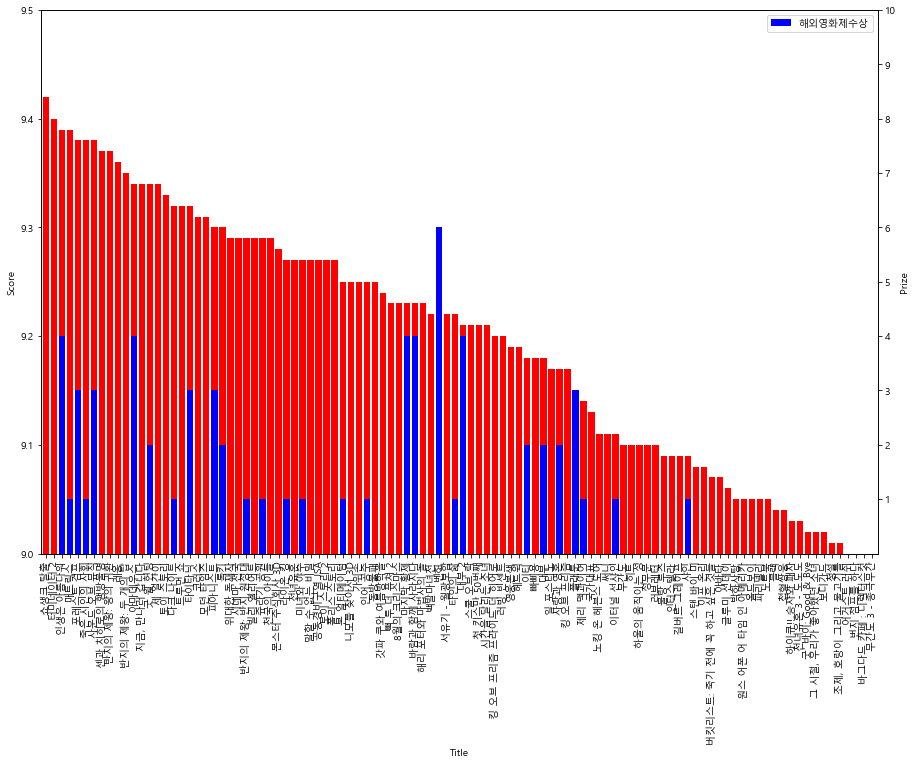

In [151]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.8
df1=Reopen_Score10.filter(items=['Title', 'Score'])
df2=Reopen_Score10.filter(items=['Title', '해외영화제수상'])
df1.plot(x='Title', kind='bar', color='red', ax=ax, width=width, position=0.5, ylim=[9,9.5], legend=False)
df2.plot(x='Title',kind='bar', color='blue', ax=ax2, width=width, position=0.5, yticks=[1,2,3,4,5,6,7,8,9,10],legend=True)
ax.set_ylabel('Score')
ax2.set_ylabel('Prize')
plt.show()

<Figure size 1080x720 with 0 Axes>

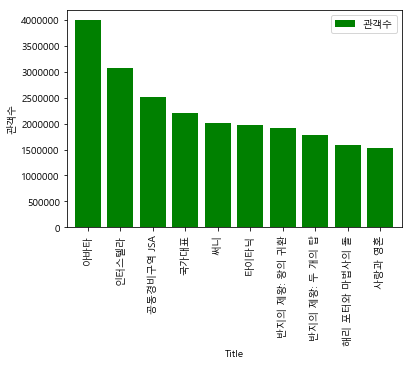

In [152]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure
width = 0.8
df1=Reopen_Pop.filter(items=['Title', '관객수'])
g1=df1.plot(x='Title', kind='bar', color='green', width=width, position=0.5)
g1.set_ylabel('관객수')
plt.show()

<Figure size 1080x720 with 0 Axes>

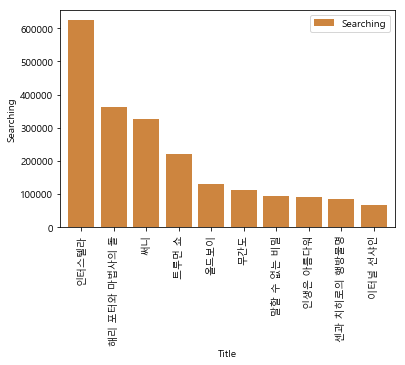

In [153]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure
width = 0.8
df1=Reopen_Searching.filter(items=['Title', 'Searching'])
g1=df1.plot(x='Title', kind='bar', color='peru', width=width, position=0.5)
g1.set_ylabel('Searching')
plt.show()

In [154]:
notreopenDF_dome=MovieDF[MovieDF['재개봉여부']==0][MovieDF['국내{1}/외국(0)']==1]

C:\Python\Anaconda3-5.2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [155]:
notreopenDF_dome

,Title,국내{1}/외국(0),관객수,Score,해외영화제수상,국내영화제수상,Searching,VOD이용건수,재개봉여부
4,덕구,1,50850,9.45,0,0,11230,0,0
19,살인의 추억,1,1912715,9.37,0,1,44500,0,0
26,아이 캔 스피크,1,796658,9.36,0,0,27770,58918,0
27,클래식,1,564348,9.36,0,0,44400,0,0
28,동주,1,376321,9.36,0,0,26200,3911,0
38,다시 태어나도 우리,1,24398,9.34,0,0,2670,3215,0
39,울지마 톤즈,1,174478,9.34,0,0,5580,0,0
44,그대를 사랑합니다,1,517602,9.34,0,0,10130,0,0
53,클레멘타인,1,35013,9.33,0,0,26970,0,0
55,집으로...,1,1576943,9.32,0,2,100,0,0


In [156]:
dome_NReopen_Score10=notreopenDF_dome.sort_values('Score', ascending=False).head(10)
dome_NReopen_Searching=notreopenDF_dome.sort_values('Searching', ascending=False).head(10)
dome_NReopen_Pop=notreopenDF_dome.sort_values('관객수', ascending=False).head(10)
dome_NReopen_Score10T=notreopenDF_dome.sort_values('Score', ascending=False).head(10)['Title']
dome_NReopen_Score10P=notreopenDF_dome.sort_values('Score', ascending=False).head(10)['해외영화제수상']
dome_NReopen_Score10S=notreopenDF_dome.sort_values('Score', ascending=False).head(10)['Score']

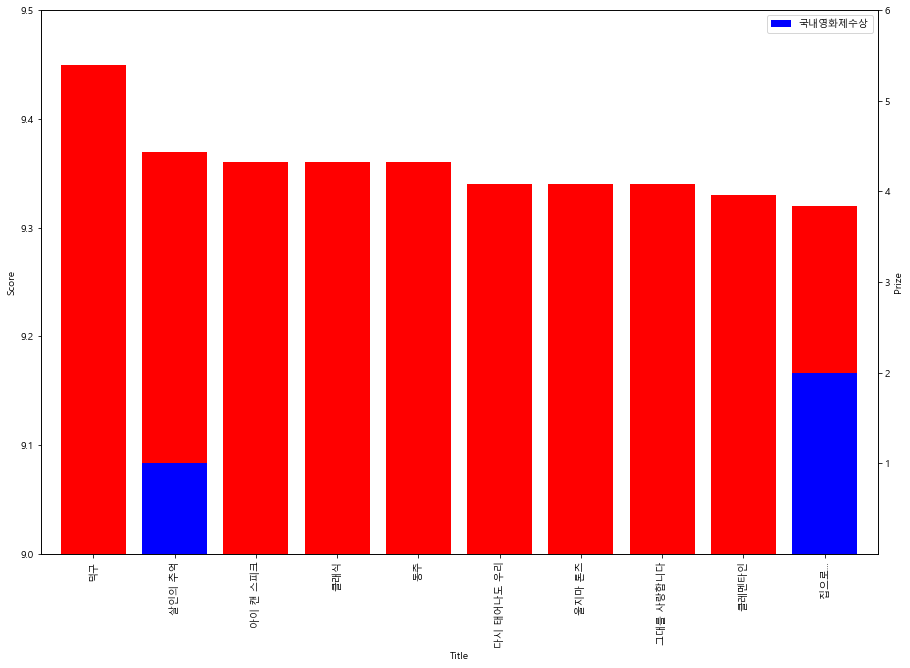

In [157]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.8
df1=dome_NReopen_Score10.filter(items=['Title', 'Score'])
df2=dome_NReopen_Score10.filter(items=['Title', '국내영화제수상'])
df1.plot(x='Title', kind='bar', color='red', ax=ax, width=width, position=0.5, ylim=[9,9.5], legend=False)
df2.plot(x='Title',kind='bar', color='blue', ax=ax2, width=width, position=0.5, yticks=[1,2,3,4,5,6],legend=True)
ax.set_ylabel('Score')
ax2.set_ylabel('Prize')
plt.show()

<Figure size 1080x720 with 0 Axes>

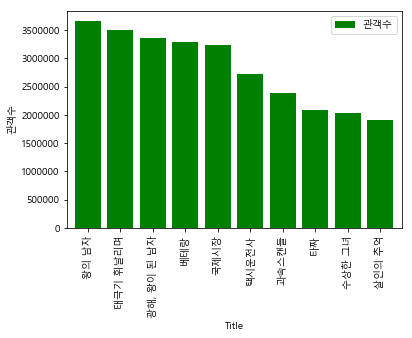

In [158]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure
width = 0.8
df1=dome_NReopen_Pop.filter(items=['Title', '관객수'])
g1=df1.plot(x='Title', kind='bar', color='green', width=width, position=0.5)
g1.set_ylabel('관객수')
plt.show()

<Figure size 1080x720 with 0 Axes>

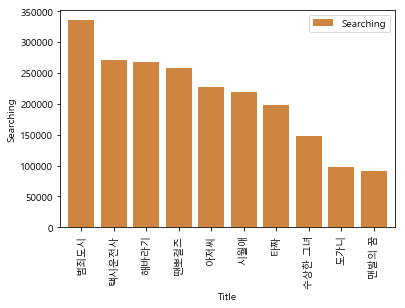

In [159]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure
width = 0.8
df1=dome_NReopen_Searching.filter(items=['Title', 'Searching'])
g1=df1.plot(x='Title', kind='bar', color='peru', width=width, position=0.5)
g1.set_ylabel('Searching')
plt.show()

In [160]:
notreopenDF_abr=MovieDF[MovieDF['재개봉여부']==0][MovieDF['국내{1}/외국(0)']==0]
notreopenDF_abr

C:\Python\Anaconda3-5.2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Title,국내{1}/외국(0),관객수,Score,해외영화제수상,국내영화제수상,Searching,VOD이용건수,재개봉여부
6,원더,0,114196,9.41,0,0,39090,18294,0
10,라이언 일병 구하기,0,593681,9.38,2,0,15420,0,0
12,월-E,0,482446,9.38,0,0,1050,0,0
16,헬프,0,78752,9.38,1,0,6700,0,0
17,토이 스토리 3,0,511917,9.38,0,0,14210,1179,0
18,나 홀로 집에,0,869820,9.38,0,0,29960,946,0
20,위대한 쇼맨,0,606546,9.37,0,0,114300,29833,0
21,글래디에이터,0,1242055,9.37,0,0,14650,0,0
25,패왕별희,0,247454,9.36,1,0,13950,0,0
29,캐스트 어웨이,0,732404,9.35,0,0,79900,0,0


In [161]:
abr_NReopen_Score10=notreopenDF_abr.sort_values('Score', ascending=False).head(10)
abr_NReopen_Searching=notreopenDF_abr.sort_values('Searching', ascending=False).head(10)
abr_NReopen_Pop=notreopenDF_abr.sort_values('관객수', ascending=False).head(10)
abr_NReopen_Score10T=notreopenDF_abr.sort_values('Score', ascending=False).head(10)['Title']
abr_NReopen_Score10P=notreopenDF_abr.sort_values('Score', ascending=False).head(10)['해외영화제수상']
abr_NReopen_Score10S=notreopenDF_abr.sort_values('Score', ascending=False).head(10)['Score']

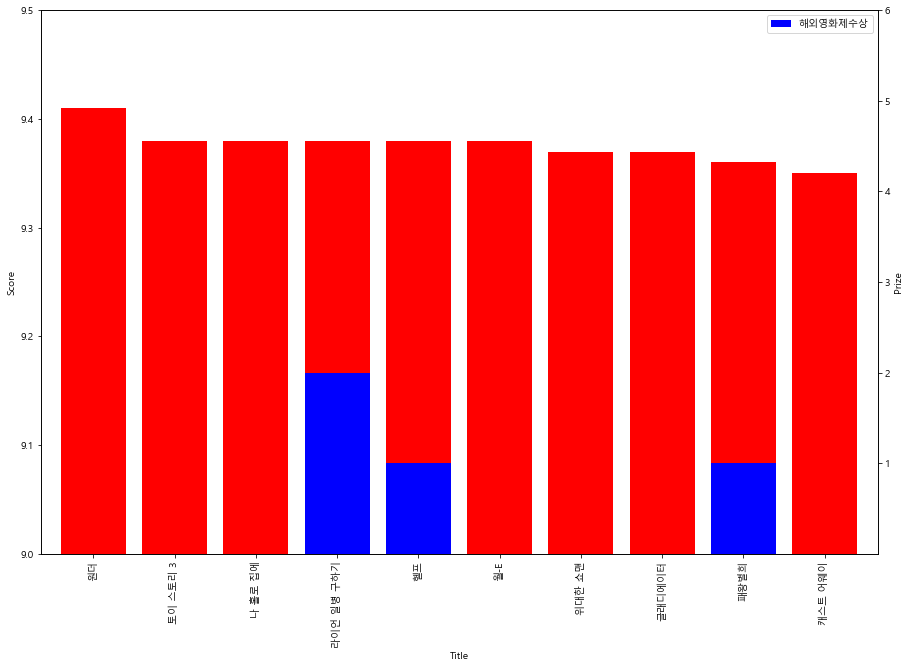

In [162]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.8
df1=abr_NReopen_Score10.filter(items=['Title', 'Score'])
df2=abr_NReopen_Score10.filter(items=['Title', '해외영화제수상'])
df1.plot(x='Title', kind='bar', color='red', ax=ax, width=width, position=0.5, ylim=[9,9.5], legend=False)
df2.plot(x='Title',kind='bar', color='blue', ax=ax2, width=width, position=0.5, yticks=[1,2,3,4,5,6],legend=True)
ax.set_ylabel('Score')
ax2.set_ylabel('Prize')
plt.show()

<Figure size 1080x720 with 0 Axes>

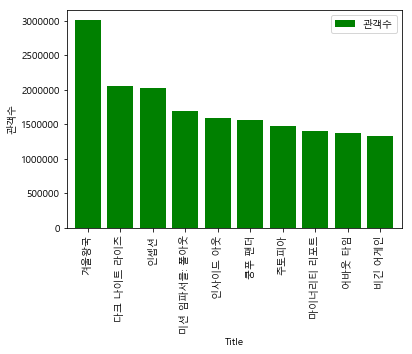

In [163]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure
width = 0.8
df1=abr_NReopen_Pop.filter(items=['Title', '관객수'])
g1=df1.plot(x='Title', kind='bar', color='green', width=width, position=0.5)
g1.set_ylabel('관객수')
plt.show()

<Figure size 1080x720 with 0 Axes>

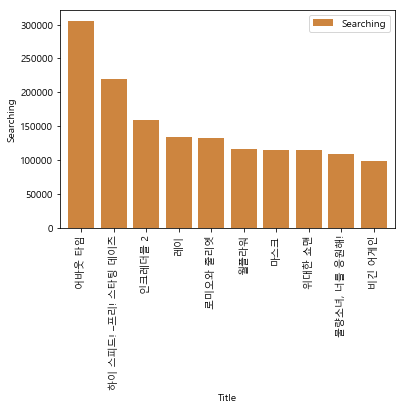

In [164]:
fig = plt.figure(figsize=(15,10)) # Create matplotlib figure
width = 0.8
df1=abr_NReopen_Searching.filter(items=['Title', 'Searching'])
g1=df1.plot(x='Title', kind='bar', color='peru', width=width, position=0.5)
g1.set_ylabel('Searching')
plt.show()

In [165]:
MovieDF[MovieDF['재개봉여부']==0][MovieDF['국내{1}/외국(0)']==0].sort_values('Searching', ascending=False)

C:\Python\Anaconda3-5.2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Title,국내{1}/외국(0),관객수,Score,해외영화제수상,국내영화제수상,Searching,VOD이용건수,재개봉여부
275,어바웃 타임,0,1368822,9.15,0,0,305900,5742,0
194,하이 스피드! –프리! 스타팅 데이즈,0,10627,9.22,0,0,219300,0,0
148,인크레더블 2,0,880533,9.24,0,0,159600,0,0
421,레이,0,141402,9.03,2,0,133500,0,0
145,로미오와 줄리엣,0,267372,9.24,0,0,132000,0,0
376,월플라워,0,10529,9.06,0,0,116600,0,0
257,마스크,0,147373,9.17,0,0,115000,0,0
20,위대한 쇼맨,0,606546,9.37,0,0,114300,29833,0
325,"불량소녀, 너를 응원해!",0,6502,9.11,0,0,108500,0,0
442,비긴 어게인,0,1324469,9.02,0,0,97900,8908,0


In [166]:
abr_total=pd.DataFrame({'Score':list(abr_NReopen_Score10['Title']), '관객수':list(abr_NReopen_Pop['Title']),'Searching':list(abr_NReopen_Searching['Title'])})

In [167]:
abr_total

,Score,관객수,Searching
0,원더,겨울왕국,어바웃 타임
1,토이 스토리 3,다크 나이트 라이즈,하이 스피드! –프리! 스타팅 데이즈
2,나 홀로 집에,인셉션,인크레더블 2
3,라이언 일병 구하기,미션 임파서블: 폴아웃,레이
4,헬프,인사이드 아웃,로미오와 줄리엣
5,월-E,쿵푸 팬더,월플라워
6,위대한 쇼맨,주토피아,마스크
7,글래디에이터,마이너리티 리포트,위대한 쇼맨
8,패왕별희,어바웃 타임,"불량소녀, 너를 응원해!"
9,캐스트 어웨이,비긴 어게인,비긴 어게인


In [61]:
dome_total=pd.DataFrame({'Score':list(dome_NReopen_Score10['Title']), '관객수':list(dome_NReopen_Pop['Title']),'Searching':list(dome_NReopen_Searching['Title'])})

In [62]:
dome_total

,Score,관객수,Searching
0,살인의 추억,왕의 남자,범죄도시
1,아이 캔 스피크,태극기 휘날리며,택시운전사
2,동주,베테랑,땐뽀걸즈
3,다시 태어나도 우리,국제시장,아저씨
4,울지마 톤즈,택시운전사,시월애
5,그대를 사랑합니다,타짜,타짜
6,클레멘타인,수상한 그녀,수상한 그녀
7,집으로...,살인의 추억,도가니
8,소원,아저씨,맨발의 꿈
9,아기공룡 둘리 - 얼음별 대모험,1987,왕의 남자


In [63]:
MovieDF[MovieDF['재개봉여부']!=0].groupby(['해외영화제수상']).size()


해외영화제수상
0    71
1    11
2     4
3     3
4     2
6     1
dtype: int64

In [64]:
Prize_reopen=MovieDF[MovieDF['해외영화제수상']!=0].groupby(['재개봉여부']).size()
Prize_reopenDF=pd.DataFrame(Prize_reopen)
Prize_reopenDF['Prob']=100*Prize_reopenDF[0]/pd.Series(Prize_reopen).sum()
Prize_reopenDF=Prize_reopenDF.drop(0, axis=1)

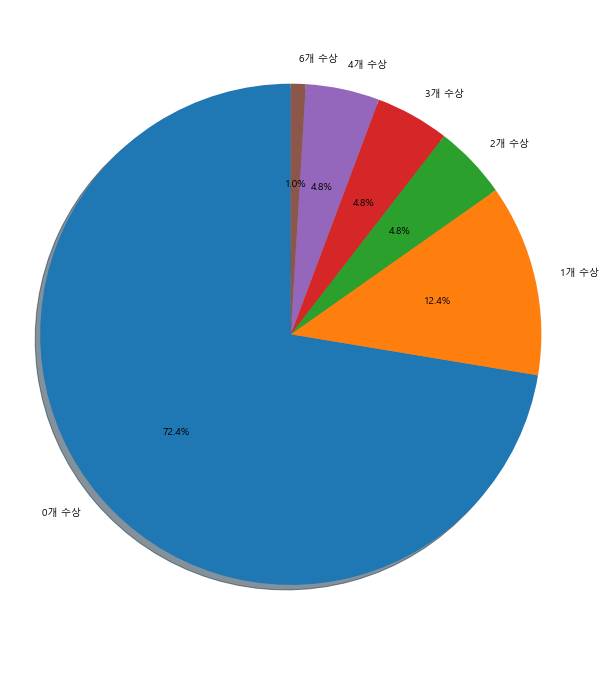

In [65]:
labels = '0개 수상', '1개 수상', '2개 수상', '3개 수상', '4개 수상', '6개 수상'
sizes  = [76, 13, 5, 5, 5, 1]

fig, ax1 = plt.subplots(figsize=(10, 12), subplot_kw=dict(aspect="equal"))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<Figure size 1440x1080 with 0 Axes>

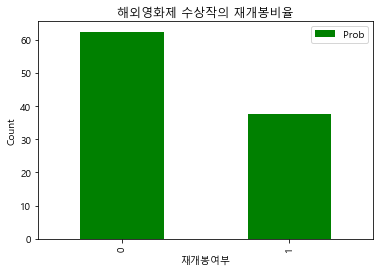

In [169]:
fig = plt.figure(figsize=(10,10)) # Create matplotlib figure
width = 0.5
g2=Prize_reopenDF.plot(kind='bar', color='green', width=width, position=0.5, title='해외영화제 수상작의 재개봉비율')
g2.set_ylabel('Count')
plt.show()

In [170]:
Prize_reopen2=MovieDF[MovieDF['해외영화제수상']>=4].groupby(['재개봉여부']).size()
Prize_reopenDF2=pd.DataFrame(Prize_reopen2)
Prize_reopenDF2['Prob']=100*Prize_reopenDF2[0]/pd.Series(Prize_reopen2).sum()
Prize_reopenDF2=Prize_reopenDF2.drop(0, axis=1)

<Figure size 720x720 with 0 Axes>

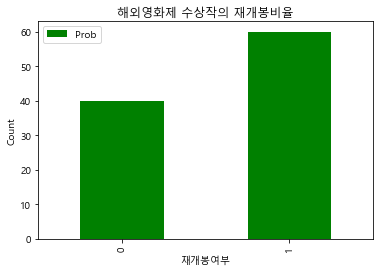

In [171]:
fig = plt.figure(figsize=(10,10)) # Create matplotlib figure
width = 0.5
g2=Prize_reopenDF2.plot(kind='bar', color='green', width=width, position=0.5, title='해외영화제 4개이상 수상작의 재개봉비율')
g2.set_ylabel('Count')
plt.show()

In [67]:
dome_Prize_reopen=MovieDF[MovieDF['국내영화제수상']!=0].groupby(['재개봉여부']).size()
dome_Prize_reopenDF=pd.DataFrame(dome_Prize_reopen)
dome_Prize_reopenDF['Prob']=100*dome_Prize_reopenDF[0]/pd.Series(dome_Prize_reopen).sum()
dome_Prize_reopenDF=dome_Prize_reopenDF.drop(0, axis=1)

<Figure size 720x720 with 0 Axes>

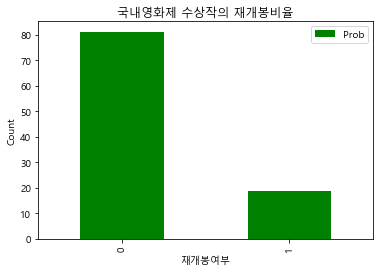

In [68]:
fig = plt.figure(figsize=(10,10)) # Create matplotlib figure
width = 0.5
g2=dome_Prize_reopenDF.plot(kind='bar', color='green', width=width, position=0.5, title='국내영화제 수상작의 재개봉비율')
g2.set_ylabel('Count')
plt.show()